In [22]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import ipywidgets as widgets  # interactive display
from scipy import stats



In [2]:
def plot_observed_vs_predicted(x, y, y_hat, theta_hat):
    """ Plot observed vs predicted data
  
    Args:
      x (ndarray): observed x values
      y (ndarray): observed y values
      y_hat (ndarray): predicted y values
      theta_hat (ndarray):
    """
    fig, ax = plt.subplots()
    ax.scatter(x, y, label='Observed')  # our data scatter plot
    ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
    # plot residuals
    ymin = np.minimum(y, y_hat)
    ymax = np.maximum(y, y_hat)
    ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
    ax.set(
        title=fr"$\hat{{\theta}}$ = {theta_hat:0.2f}, MSE = {np.mean((y - y_hat)**2):.2f}",
        xlabel='x',
        ylabel='y'
    )
    ax.legend()
    plt.show()

# Linear Regression & Mean Squared Error
- Predict the linear relationship b/w input (x) and output (y - ex. neural response)
- $y = \theta_1 * x + \theta_0$

- Commonly want to minimize error b/w observed and predicted values
- Mean Squared Error $(MSE) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2$
- Plotting the MSE against theta allows you to find the best fit line by minimizing this function (i.e partial derivative wrt to \theta)

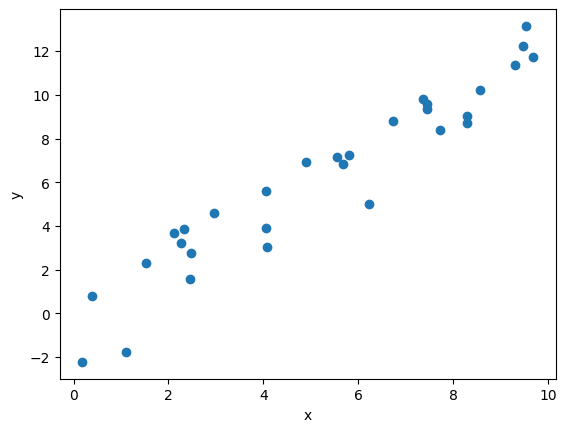

In [3]:
np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 30

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

# Plot the results
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

## Mean Squared Error
$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2$

In [4]:
def mse(x, y, theta_hat):
    """Compute the mean squared error
  
    Args:
      x (ndarray): An array of shape (samples,) that contains the input values.
      y (ndarray): An array of shape (samples,) that contains the corresponding
        measurement values to the inputs.
      theta_hat (float): An estimate of the slope parameter
  
    Returns:
      float: The mean squared error of the data with the estimated parameter.
    """
    # Compute mean squared error
    y_hat = theta_hat * x
    mse = np.mean((y - y_hat)**2)

    return mse


theta_hats = [0.75, 1.0, 1.5]
for theta_hat in theta_hats:
    print(f"theta_hat of {theta_hat} has an MSE of {mse(x, y, theta_hat):.2f}")

theta_hat of 0.75 has an MSE of 9.08
theta_hat of 1.0 has an MSE of 3.01
theta_hat of 1.5 has an MSE of 4.52


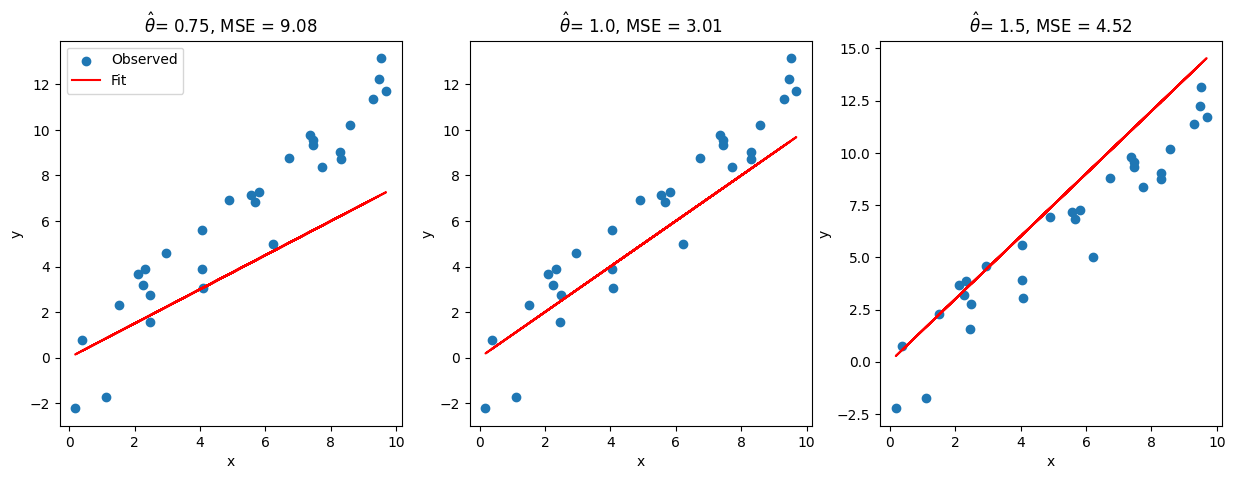

In [5]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
for theta_hat, ax in zip(theta_hats, axes):

    # True data
    ax.scatter(x, y, label='Observed')  # our data scatter plot

    # Compute and plot predictions
    y_hat = theta_hat * x
    ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model

    ax.set(
        title= fr'$\hat{{\theta}}$= {theta_hat}, MSE = {np.mean((y - y_hat)**2):.2f}',
        xlabel='x',
        ylabel='y'
    );

axes[0].legend()
plt.show()

In [6]:
@widgets.interact(theta_hat=widgets.FloatSlider(1.0, min=0.0, max=2.0))
def plot_data_estimate(theta_hat):
    y_hat = theta_hat * x
    plot_observed_vs_predicted(x, y, y_hat, theta_hat)

interactive(children=(FloatSlider(value=1.0, description='theta_hat', max=2.0), Output()), _dom_classes=('widg…

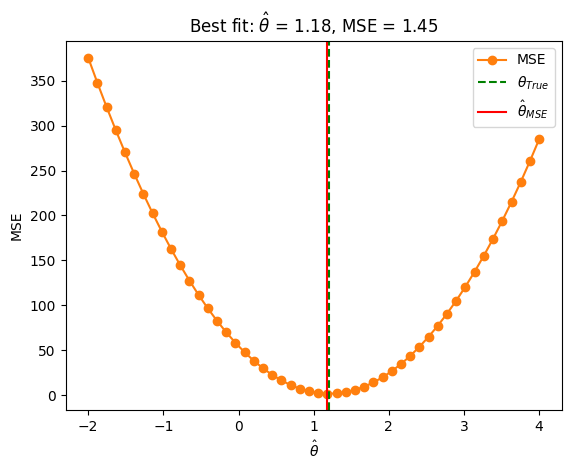

In [8]:
theta_hat_grid = np.linspace(-2.0, 4.0)
errors = np.zeros(len(theta_hat_grid))
for i, theta_hat in enumerate(theta_hat_grid):
    errors[i] = mse(x, y, theta_hat)

# Find theta that results in lowest error
best_error = np.min(errors)
theta_hat = theta_hat_grid[np.argmin(errors)]


# Plot results
fig, ax = plt.subplots()
ax.plot(theta_hat_grid, errors, '-o', label='MSE', c='C1')
ax.axvline(theta, color='g', ls='--', label=r"$\theta_{True}$")
ax.axvline(theta_hat, color='r', ls='-', label=r"$\hat{{\theta}}_{MSE}$")
ax.set(
    title=fr"Best fit: $\hat{{\theta}}$ = {theta_hat:.2f}, MSE = {best_error:.2f}",
    xlabel=r"$\hat{{\theta}}$",
    ylabel='MSE')
ax.legend()
plt.show()

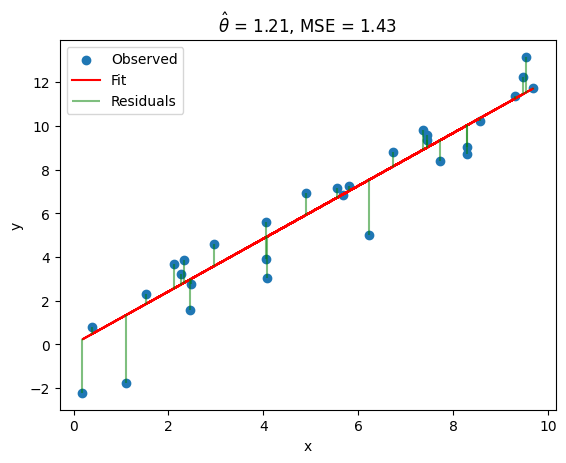

In [9]:
def solve_normal_eqn(x, y):
    """Solve the normal equations to produce the value of theta_hat that minimizes
      MSE.
  
      Args:
      x (ndarray): An array of shape (samples,) that contains the input values.
      y (ndarray): An array of shape (samples,) that contains the corresponding
        measurement values to the inputs.
  
    Returns:
      float: the value for theta_hat arrived from minimizing MSE
    """

    # Compute theta_hat analytically
    theta_hat = np.dot(x, y) / np.dot(x, x)

    return theta_hat


theta_hat = solve_normal_eqn(x, y)
y_hat = theta_hat * x
plot_observed_vs_predicted(x, y, y_hat, theta_hat)

In [10]:
# @title Plotting Functions
def plot_density_image(x, y, theta, sigma=1, ax=None):
    """ Plots probability distribution of y given x, theta, and sigma
  
    Args:
  
      x (ndarray): An array of shape (samples,) that contains the input values.
      y (ndarray): An array of shape (samples,) that contains the corresponding
        measurement values to the inputs.
      theta (float): Slope parameter
      sigma (float): standard deviation of Gaussian noise
  
    """

    # plot the probability density of p(y|x,theta)
    if ax is None:
        fig, ax = plt.subplots()

    xmin, xmax = np.floor(np.min(x)), np.ceil(np.max(x))
    ymin, ymax = np.floor(np.min(y)), np.ceil(np.max(y))
    xx = np.linspace(xmin, xmax, 50)
    yy = np.linspace(ymin, ymax, 50)

    surface = np.zeros((len(yy), len(xx)))
    for i, x_i in enumerate(xx):
        surface[:, i] = stats.norm(theta * x_i, sigma).pdf(yy)

    ax.set(xlabel='x', ylabel='y')

    return ax.imshow(surface, origin='lower', aspect='auto', vmin=0, vmax=None,
                     cmap=plt.get_cmap('Wistia'),
                     extent=[xmin, xmax, ymin, ymax])

## Maximum Likelihood Estimation

- This is another way of fitting a linear model to the data. 
- We will be using a Guassian distribution to model "noise" in the data. We want to create some randomness in the data to simulate real-world data.
- By adding Gaussian noise to a linear model, you can now think of $y$ being sampled from a Gaussian distribution with a shifted mean.
- The shape of this distribution is still "linear" in direction but has a spread along the $\theta$ gradient. 

$y = \theta x + \mu$ where $\mu \sim \mathcal{N}(0, \sigma)$

Now, we look at likelihood. This is attempting to find the $\theta$ that best matches the observed data. 
- The likelihood function measures the probability of observing the given data under a specific model with parameters $\theta$. For the Gaussian noise assumption, the probability density function of each observation $y_i$ given the model parameters $\theta$ is:
- Maximizing the likelihood function will give us a \theta that best fits the data. We do this by maximizing the log likelihood function.



In [12]:
np.random.seed(121)
theta = 1.2
n_samples = 30
x = 10 * np.random.rand(n_samples) # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples) # sample from a standard normal distribution
y = theta * x + noise

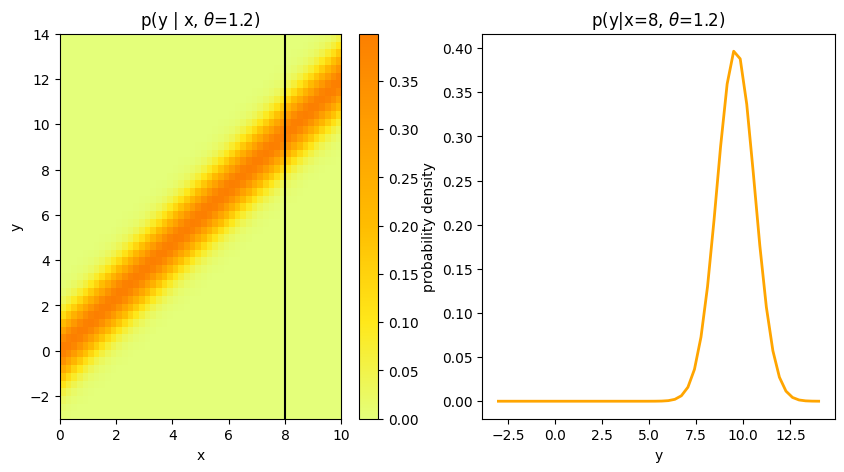

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Invokes helper function to generate density image plots from data and parameters
im = plot_density_image(x, y, 1.2, ax=ax1)
plt.colorbar(im, ax=ax1)
ax1.axvline(8, color='k')
ax1.set(title=r'p(y | x, $\theta$=1.2)')

# Plot pdf for given x
ylim = ax1.get_ylim()
yy = np.linspace(ylim[0], ylim[1], 50)
ax2.plot(yy, stats.norm(theta * 8, 1).pdf(yy), color='orange', linewidth=2)
ax2.set(
    title=r'p(y|x=8, $\theta$=1.2)',
    xlabel='y',
    ylabel='probability density')
plt.show()

In [14]:
def likelihood(theta_hat, x, y):
    """The likelihood function for a linear model with noise sampled from a
      Gaussian distribution with zero mean and unit variance.
  
    Args:
      theta_hat (float): An estimate of the slope parameter.
      x (ndarray): An array of shape (samples,) that contains the input values.
      y (ndarray): An array of shape (samples,) that contains the corresponding
        measurement values to the inputs.
  
    Returns:
      ndarray: the likelihood values for the theta_hat estimate
    """
    sigma = 1

    # Compute Gaussian likelihood
    pdf = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-0.5 * (y - theta_hat * x)**2 / sigma**2) 

    return pdf
print(likelihood(1.0, x[1], y[1]))


0.11344443599846923


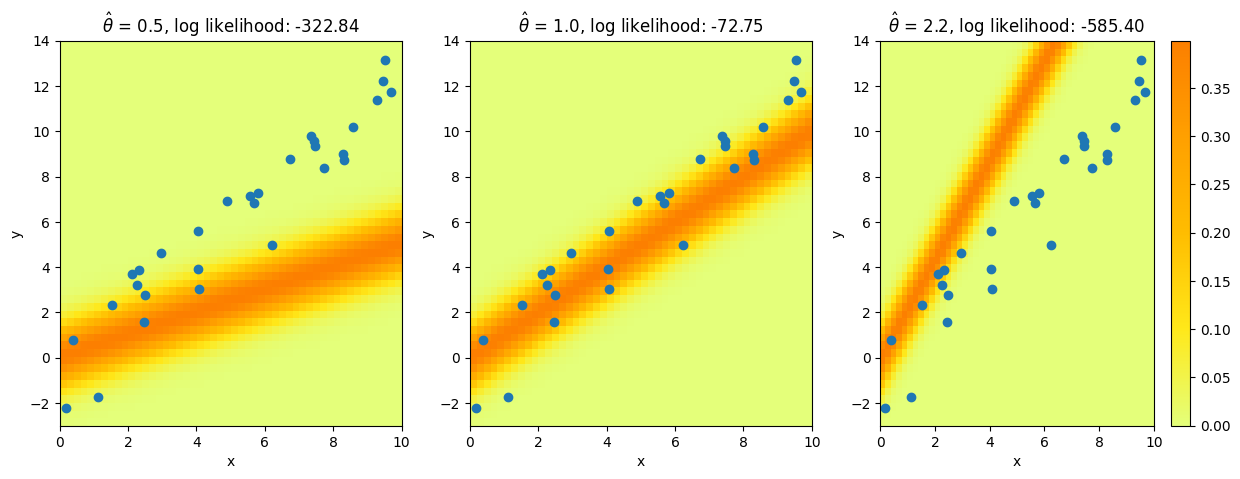

In [15]:
theta_hats = [0.5, 1.0, 2.2]
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
for theta_hat, ax in zip(theta_hats, axes):
    ll = np.sum(np.log(likelihood(theta_hat, x, y)))  # log likelihood
    im = plot_density_image(x, y, theta_hat, ax=ax)
    ax.scatter(x, y)
    ax.set(title=fr'$\hat{{\theta}}$ = {theta_hat}, log likelihood: {ll:.2f}')
plt.colorbar(im, ax=ax)
plt.show()

## Maximizing Log Liklihood

Firstly, we use log liklihood because the log transforms a product of independent RVs (sampling from the joint xy gaussian distribution) into a sum. This satisfies computational limitations where products can bring floats to below precision.

Secondly, we want to maximize Log liklihood, which is equivalent to minimizing negative log liklihood. Doing so with a partial derivative actually results in an equation that is very similar to what we have for the Mean Squared Error!  

In [16]:
theta_hat_mle = np.dot(x, y) / np.dot(x, x)

In [17]:
theta_hat_mle

np.float64(1.2084421298265955)

## Tutorial 3: Bootstrapping

1) We want to develop confidence intervals in our estimates of the model parameters
2) We'd like to use Bootstrapping to sample the underlying data to be able to repeat the model parameter search

Notes:
- Sampling with replacement means that each data point from the original dataset can appear multiple times in a bootstrap sample, or not at all.


In [19]:
def plot_original_and_resample(x, y, x_, y_):
    """ Plot the original sample and the resampled points from this sample.
  
    Args:
      x (ndarray): An array of shape (samples,) that contains the input values.
      y (ndarray): An array of shape (samples,) that contains the corresponding
        measurement values to the inputs.
      x_ (ndarray): An array of shape (samples,) with a subset of input values from x
      y_ (ndarray): An array of shape (samples,) with a the corresponding subset
        of measurement values as x_ from y
  
    """
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    ax1.scatter(x, y)
    ax1.set(title='Original', xlabel='x', ylabel='y')

    ax2.scatter(x_, y_, color='c')

    ax2.set(title='Resampled', xlabel='x', ylabel='y',
            xlim=ax1.get_xlim(), ylim=ax1.get_ylim())
    plt.show()

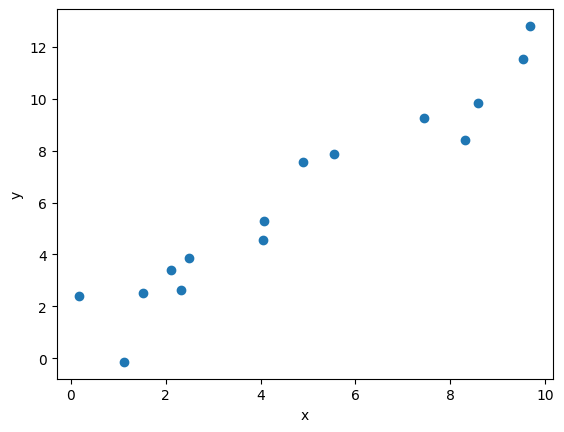

In [20]:
np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 15

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

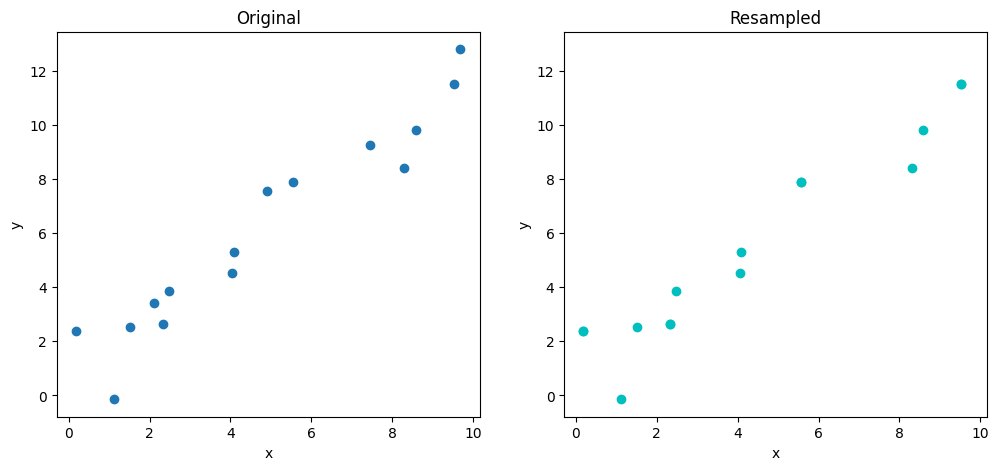

In [24]:
def resample_with_replacement(x, y):
    """Resample data points with replacement from the dataset of `x` inputs and
    `y` measurements.
  
    Args:
      x (ndarray): An array of shape (samples,) that contains the input values.
      y (ndarray): An array of shape (samples,) that contains the corresponding
        measurement values to the inputs.
  
    Returns:
      ndarray, ndarray: The newly resampled `x` and `y` data points.
    """

    # Get array of indices for resampled points
    # Pick n integers from a range of [0, n) 
    sample_idx = random.choice(len(x), size= len(x), replace=True)

    # Sample from x and y according to sample_idx
    x_ = x[sample_idx]
    y_ = y[sample_idx]

    return x_, y_

x_, y_ = resample_with_replacement(x, y)

plot_original_and_resample(x, y, x_, y_)

In [25]:
def solve_normal_eqn(x, y):
    """Solve the normal equations to produce the value of theta_hat that minimizes
      MSE.
  
      Args:
      x (ndarray): An array of shape (samples,) that contains the input values.
      y (ndarray): An array of shape (samples,) that contains the corresponding
        measurement values to the inputs.
      thata_hat (float): An estimate of the slope parameter.
  
    Returns:
      float: the value for theta_hat arrived from minimizing MSE
    """
    theta_hat = (x.T @ y) / (x.T @ x)
    return theta_hat


def bootstrap_estimates(x, y, n=2000):
    """Generate a set of theta_hat estimates using the bootstrap method.
  
    Args:
      x (ndarray): An array of shape (samples,) that contains the input values.
      y (ndarray): An array of shape (samples,) that contains the corresponding
        measurement values to the inputs.
      n (int): The number of estimates to compute
  
    Returns:
      ndarray: An array of estimated parameters with size (n,)
    """
    theta_hats = np.zeros(n)

    # Loop over number of estimates
    for i in range(n):

        # Resample x and y
        x_, y_ = resample_with_replacement(x, y)

        # Compute theta_hat for this sample
        theta_hats[i] = solve_normal_eqn(x_, y_)

    return theta_hats

# Set random seed
np.random.seed(123)

# Get bootstrap estimates
theta_hats = bootstrap_estimates(x, y, n=2000)
print(theta_hats[0:5])

[1.27550888 1.17317819 1.18198819 1.25329255 1.20714664]


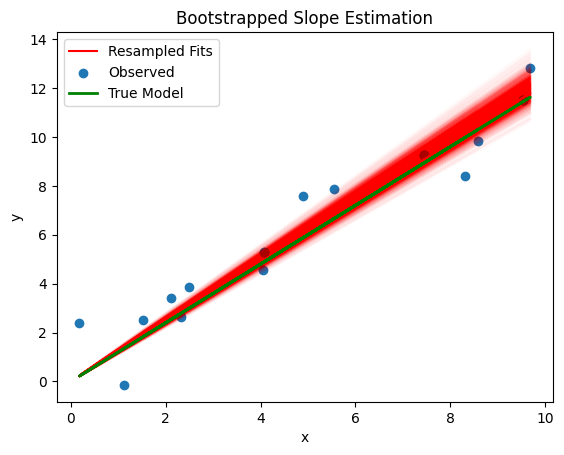

In [27]:
fig, ax = plt.subplots()

# For each theta_hat, plot model
theta_hats = bootstrap_estimates(x, y, n=2000)
for i, theta_hat in enumerate(theta_hats):
    y_hat = theta_hat * x
    ax.plot(x, y_hat, c='r', alpha=0.01, label='Resampled Fits' if i==0 else '')

# Plot observed data
ax.scatter(x, y, label='Observed')

# Plot true fit data
y_true = theta * x
ax.plot(x, y_true, 'g', linewidth=2, label='True Model')

ax.set(
    title='Bootstrapped Slope Estimation',
    xlabel='x',
    ylabel='y'
)

# Change legend line alpha property
handles, labels = ax.get_legend_handles_labels()
handles[0].set_alpha(1)

ax.legend()
plt.show()

mean = 1.24, std = 0.05


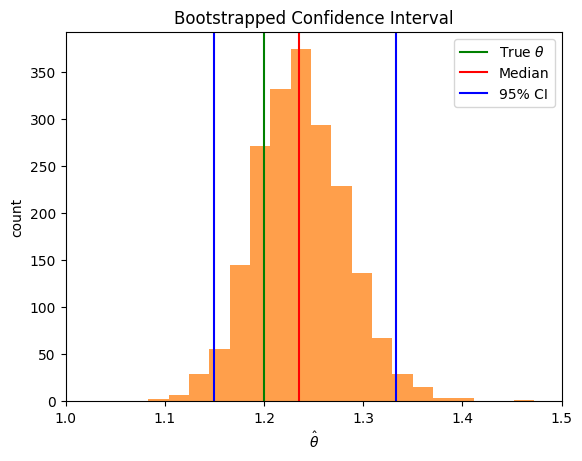

In [28]:
theta_hats = bootstrap_estimates(x, y, n=2000)
print(f"mean = {np.mean(theta_hats):.2f}, std = {np.std(theta_hats):.2f}")

fig, ax = plt.subplots()
ax.hist(theta_hats, bins=20, facecolor='C1', alpha=0.75)
ax.axvline(theta, c='g', label=r'True $\theta$')
ax.axvline(np.percentile(theta_hats, 50), color='r', label='Median')
ax.axvline(np.percentile(theta_hats, 2.5), color='b', label='95% CI')
ax.axvline(np.percentile(theta_hats, 97.5), color='b')
ax.legend()
ax.set(
    title='Bootstrapped Confidence Interval',
    xlabel=r'$\hat{{\theta}}$',
    ylabel='count',
    xlim=[1.0, 1.5]
)
plt.show()

## Tutorial 4

In [38]:
def evaluate_fits(order_list, mse_list):
    """ Compare the quality of multiple polynomial fits
    by plotting their MSE values.
  
    Args:
      order_list (list): list of the order of polynomials to be compared
      mse_list (list): list of the MSE values for the corresponding polynomial fit
    """
    fig, ax = plt.subplots()
    ax.bar(order_list, mse_list)
    ax.set(title='Comparing Polynomial Fits', xlabel='Polynomial order', ylabel='MSE')
    plt.show()


def plot_fitted_polynomials(x, y, theta_hat):
    """ Plot polynomials of different orders

    Args:
      x (ndarray): input vector of shape (n_samples)
      y (ndarray): vector of measurements of shape (n_samples)
      theta_hat (dict): polynomial regression weights for different orders
    """

    x_grid = np.linspace(x.min() - .5, x.max() + .5)

    plt.figure()

    for order in range(0, max_order + 1):
        X_design = make_design_matrix(x_grid, order)
        plt.plot(x_grid, X_design @ theta_hat[order]);

    plt.ylabel('y')
    plt.xlabel('x')
    plt.plot(x, y, 'C0.');
    plt.legend([f'order {o}' for o in range(max_order + 1)], loc=1)
    plt.title('polynomial fits')
    plt.show()

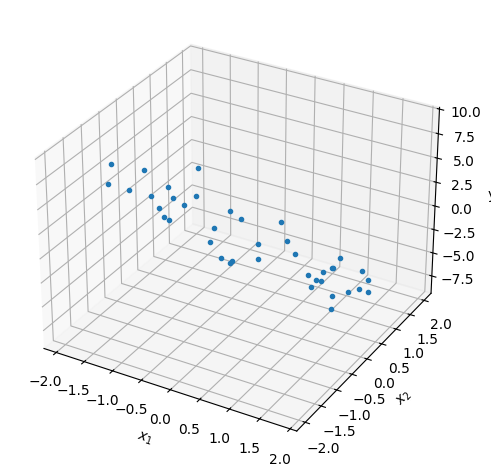

In [30]:
np.random.seed(1234)

# Set parameters
theta = [0, -2, -3]
n_samples = 40

# Draw x and calculate y
n_regressors = len(theta)
x0 = np.ones((n_samples, 1))
x1 = np.random.uniform(-2, 2, (n_samples, 1))
x2 = np.random.uniform(-2, 2, (n_samples, 1))
X = np.hstack((x0, x1, x2))
noise = np.random.randn(n_samples)
y = X @ theta + noise


ax = plt.subplot(projection='3d')
ax.plot(X[:,1], X[:,2], y, '.')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='y'
)
plt.tight_layout()

In [32]:
def ordinary_least_squares(X, y):
    """Ordinary least squares estimator for linear regression.
  
    Args:
      x (ndarray): design matrix of shape (n_samples, n_regressors)
      y (ndarray): vector of measurements of shape (n_samples)
  
    Returns:
      ndarray: estimated parameter values of shape (n_regressors)
    """

    # Compute theta_hat using OLS
    theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

    return theta_hat


theta_hat = ordinary_least_squares(X, y)
print(theta_hat)
y_hat = X @ theta_hat

# Compute MSE
print(f"MSE = {np.mean((y - y_hat)**2):.2f}")

[ 0.13861386 -2.09395731 -3.16370742]
MSE = 0.91


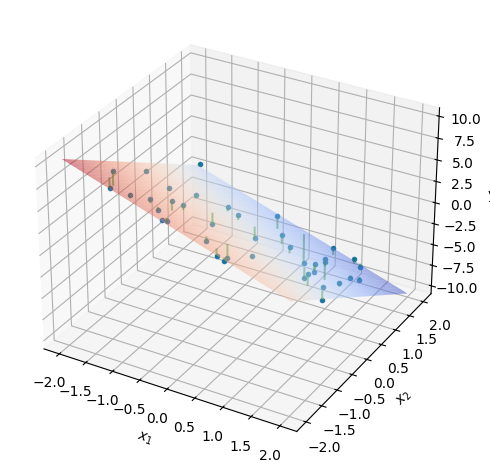

In [35]:
theta_hat = ordinary_least_squares(X, y)
xx, yy = np.mgrid[-2:2:50j, -2:2:50j]
y_hat_grid = np.array([xx.flatten(), yy.flatten()]).T @ theta_hat[1:]
y_hat_grid = y_hat_grid.reshape((50, 50))

ax = plt.subplot(projection='3d')
ax.plot(X[:, 1], X[:, 2], y, '.')
ax.plot_surface(xx, yy, y_hat_grid, linewidth=0, alpha=0.5, color='C1',
                cmap=plt.get_cmap('coolwarm'))

for i in range(len(X)):
    ax.plot((X[i, 1], X[i, 1]),
            (X[i, 2], X[i, 2]),
            (y[i], y_hat[i]),
            'g-', alpha=.5)

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='y'
)
plt.tight_layout()
plt.show()

## Polynomial Regression

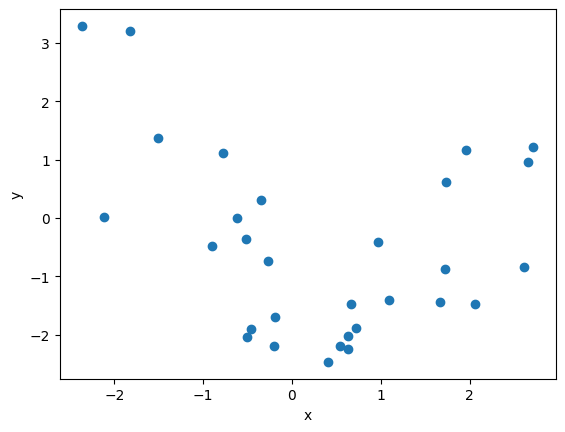

In [36]:
np.random.seed(121)
n_samples = 30
x = np.random.uniform(-2, 2.5, n_samples)  # inputs uniformly sampled from [-2, 2.5)
y =  x**2 - x - 2   # computing the outputs

output_noise = 1/8 * np.random.randn(n_samples)
y += output_noise  # adding some output noise

input_noise = 1/2 * np.random.randn(n_samples)
x += input_noise  # adding some input noise

fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

In [37]:
def make_design_matrix(x, order):
    """Create the design matrix of inputs for use in polynomial regression
  
    Args:
      x (ndarray): input vector of shape (n_samples)
      order (scalar): polynomial regression order
  
    Returns:
      ndarray: design matrix for polynomial regression of shape (samples, order+1)
    """

    # Broadcast to shape (n x 1) so dimensions work
    if x.ndim == 1:
        x = x[:, None]

    #if x has more than one feature, we don't want multiple columns of ones so we assign
    # x^0 here
    design_matrix = np.ones((x.shape[0], 1))

    # Loop through rest of degrees and stack columns (hint: np.hstack)
    for degree in range(1, order + 1):
        design_matrix = np.hstack((design_matrix, x**degree))

    return design_matrix


order = 5
X_design = make_design_matrix(x, order)

print(X_design[0:2, 0:2])

[[ 1.         -1.51194917]
 [ 1.         -0.35259945]]


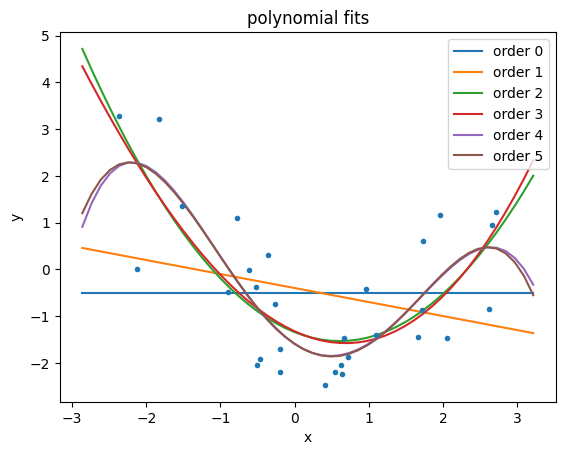

In [40]:
def solve_poly_reg(x, y, max_order):
    """Fit a polynomial regression model for each order 0 through max_order.
  
    Args:
      x (ndarray): input vector of shape (n_samples)
      y (ndarray): vector of measurements of shape (n_samples)
      max_order (scalar): max order for polynomial fits
  
    Returns:
      dict: fitted weights for each polynomial model (dict key is order)
    """

    # Create a dictionary with polynomial order as keys,
    # and np array of theta_hat (weights) as the values
    theta_hats = {}

    # Loop over polynomial orders from 0 through max_order
    for order in range(max_order + 1):

        # Create design matrix
        X_design = make_design_matrix(x, order)

        # Fit polynomial model
        this_theta = ordinary_least_squares(X_design, y)

        theta_hats[order] = this_theta

    return theta_hats


max_order = 5
theta_hats = solve_poly_reg(x, y, max_order)

# Visualize
plot_fitted_polynomials(x, y, theta_hats)

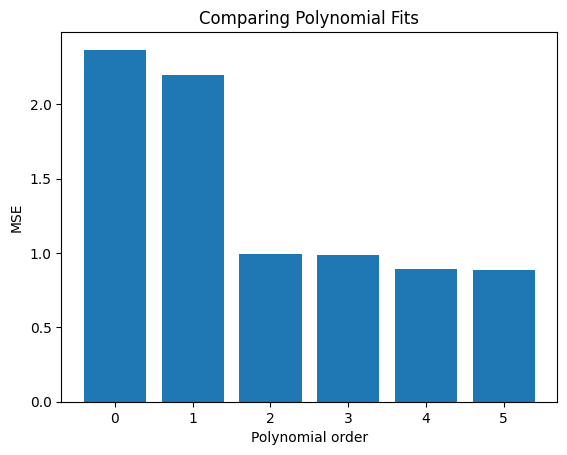

In [43]:
mse_list = []
order_list = list(range(max_order + 1))

for order in order_list:

    X_design = make_design_matrix(x, order)

    # Get prediction for the polynomial regression model of this order
    y_hat = X_design @ theta_hats[order]

    # Compute the residuals
    residuals = y - y_hat 

    # Compute the MSE
    mse = np.mean(residuals**2) 

    mse_list.append(mse)


# Visualize MSE of fits
evaluate_fits(order_list, mse_list)